In [1]:
import os,sys,inspect
currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

In [12]:
from utils.ss_to_image import final_crop
from core.emoji_to_name import emoji_2_name
from core.image_to_emoji import image_2_emoji_2
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [5]:
file_path = '../../resource/screenshots/Rohan.jpeg'

cropped_image= final_crop(file_path)
img = cropped_image

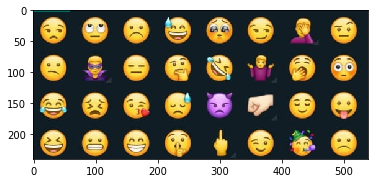

In [6]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
os.getcwd()

'/media/subhasish/Professional/emoji_project/code/notebooks'

In [29]:
directory = 'notebooks' # this made my day !!
os.chdir(directory) 

### Names obtained through CV2 template matching

In [10]:
emoji_list = emoji_2_name(img)

### New approach (Manual)

In [13]:
emojis = image_2_emoji_2(img)

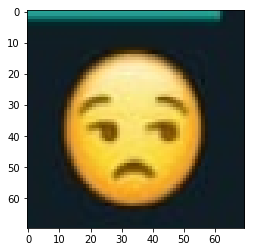

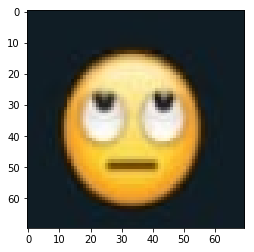

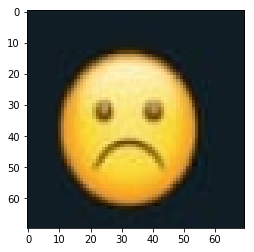

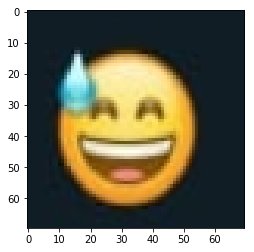

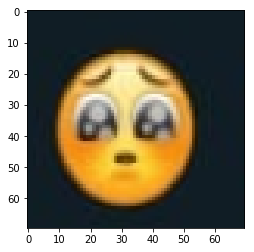

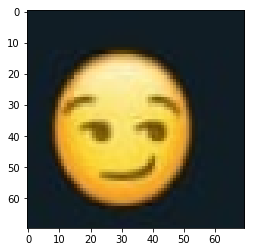

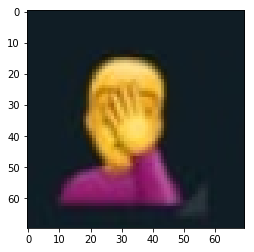

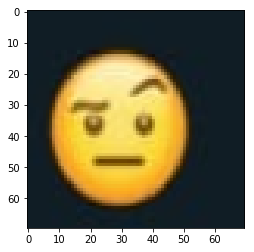

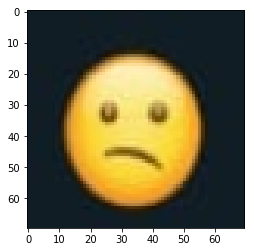

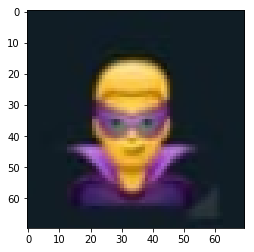

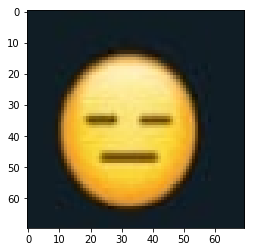

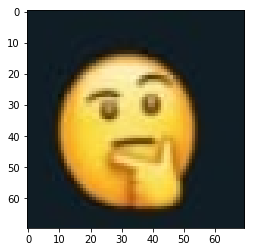

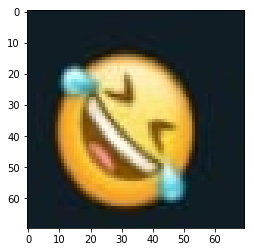

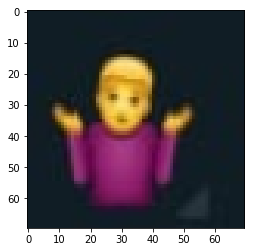

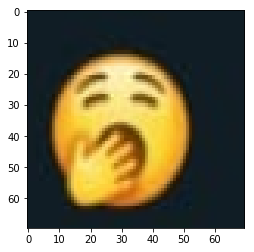

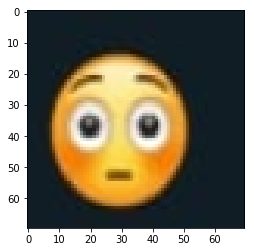

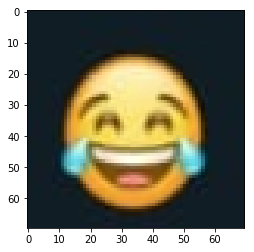

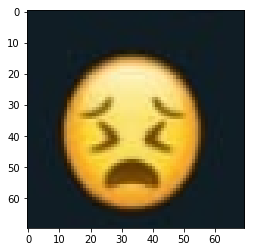

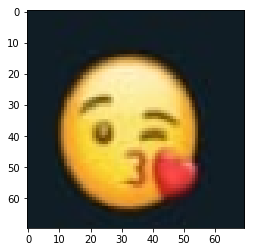

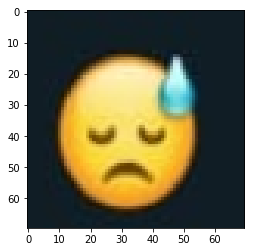

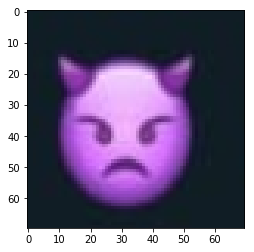

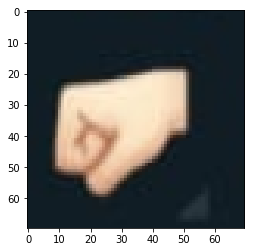

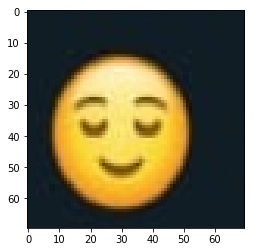

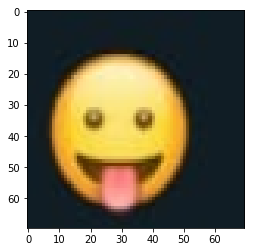

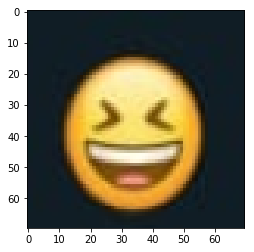

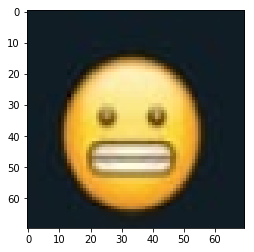

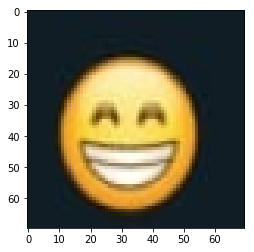

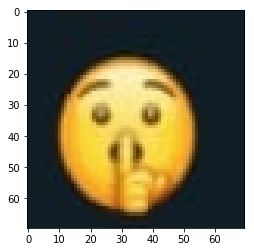

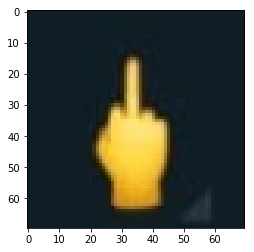

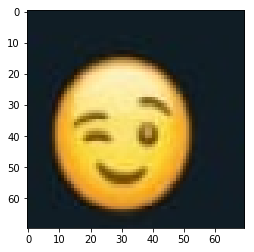

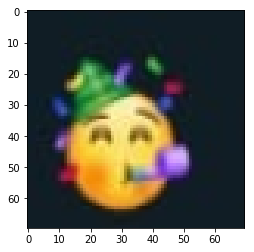

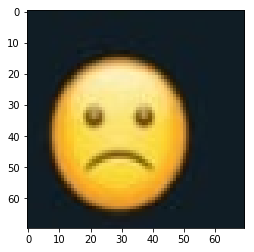

In [15]:
for i in emojis:
    plt.imshow(cv2.cvtColor(i, cv2.COLOR_BGR2RGB))
    plt.show()

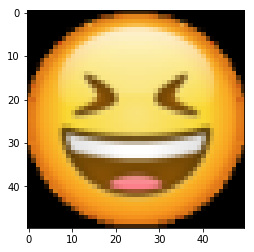

In [33]:
### Template import
temp_file_name = '../../resource/emoji_database/smiling-face-with-open-mouth-and-tightly-closed-eyes_1f606.png'
template = cv2.imread(temp_file_name)

dim = (50,50)
template = cv2.resize(template, dim, interpolation = cv2.INTER_AREA) 

plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
plt.show()

In [40]:
template.shape

(50, 50, 3)

In [56]:
img = emojis[0]
for i in range(20):
    for j in range(20):
        sample = img[i:i+50,j:j+50]

In [70]:
(sample - template)[:, :, 2]

array([[ 85, 132, 181, ...,  16,  16,  16],
       [138, 186, 225, ...,  16,  16,  16],
       [188, 229, 250, ...,  16,  16,  16],
       ...,
       [ 13,  12,  13, ...,  16,  16,  16],
       [ 14,  14,  13, ...,  16,  16,  16],
       [ 15,  14,  14, ...,  16,  16,  16]], dtype=uint8)

### DEEP

In [132]:
# emoji to name
def unit_emoji_to_name(emoji, method = 'cv2.TM_SQDIFF_NORMED'):
    emoji_score = 2**100
    output = None
    for i in os.listdir('../../resource/emoji_database'):

            template = cv2.imread('../../resource/emoji_database/' + str(i))
            dim = (50,50)
            template = cv2.resize(template, dim, interpolation = cv2.INTER_AREA) 

            res = cv2.matchTemplate(emoji[:, :, 0] ,template[:, :, 0],eval(method))

            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
            if emoji_score > min_val:
                    emoji_score = min_val
                    output = i
    return output


#### Creating emoji_dict
maps emojis from the database to indices

In [146]:
emoji_index_dict = {}
c = 0
for i in os.listdir('../../resource/emoji_database'):
    emoji_index_dict[i] = c
    c += 1

In [152]:
import pickle

In [153]:
with open('../../lib/emoji_index_dict.pickle', 'wb') as handle:
    pickle.dump(emoji_index_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [154]:
with open('../../lib/emoji_index_dict.pickle', 'rb') as handle:
    emoji_index_dict = pickle.load(handle)

In [155]:
len(emoji_index_dict)

187

In [107]:
emoji_list_de_grande = []

### Manually labelling the emojis

In [125]:
os.getcwd()

'/media/subhasish/Professional/emoji_project/code/notebooks'

In [109]:
file_path = '../../resource/screenshots/'
list_dir = os.listdir(file_path)

In [110]:
list_dir.remove('light_theme')

In [111]:
list_dir

['Anirban.jpeg',
 'aritra.jpeg',
 'Arka.jpeg',
 'Rohan.jpeg',
 'Subhasish',
 'Trisha']

In [112]:
for i in list_dir:
    if os.path.isdir(os.path.join(file_path, i)):
        for j in os.listdir(os.path.join(file_path, i)):
            file_path_1 = os.path.join(os.path.join(file_path, i), j)
            cropped_image= final_crop(file_path_1)
            img = cropped_image
            emoji_list_de_grande += image_2_emoji_2(img)
    else:
        file_path_1 = os.path.join(file_path, i)
        cropped_image= final_crop(file_path_1)
        img = cropped_image
        emoji_list_de_grande += image_2_emoji_2(img)

In [116]:
emoji_list_de_grande = np.array(emoji_list_de_grande)

In [156]:
predicted_indices_100 = []
predicted_indices_200 = []
predicted_indices_300 = []
predicted_indices_400 = []
predicted_indices_500 = []

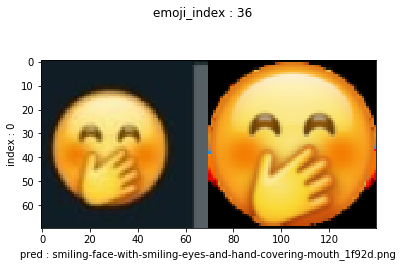

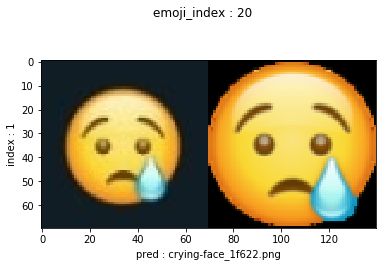

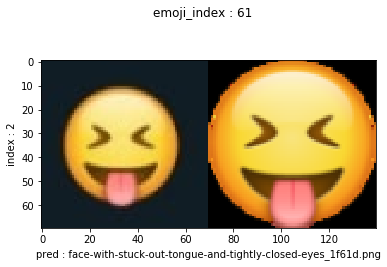

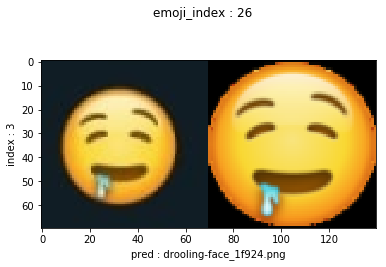

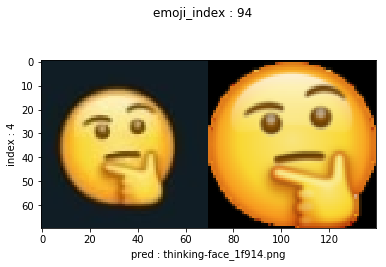

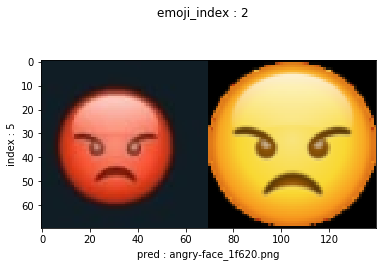

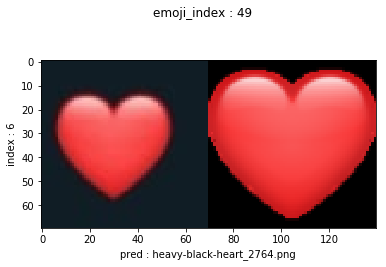

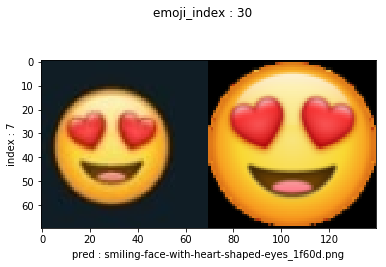

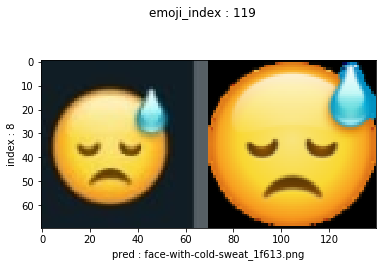

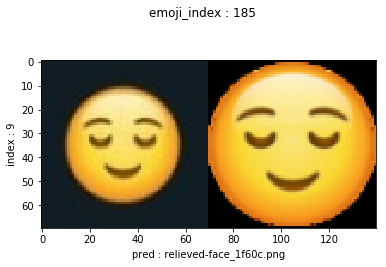

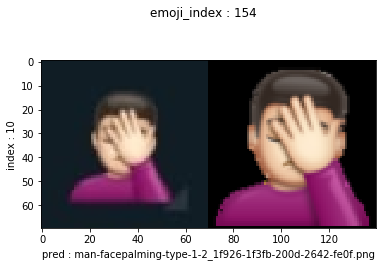

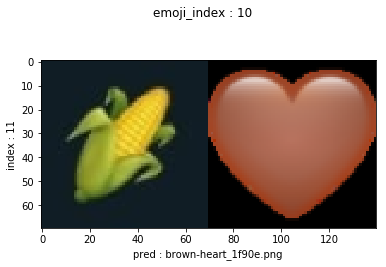

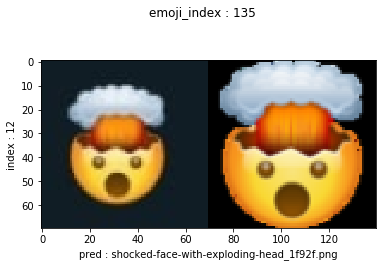

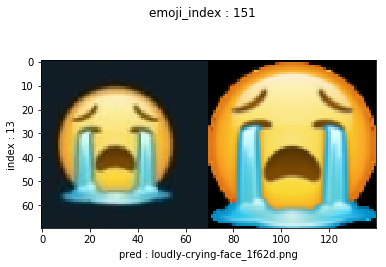

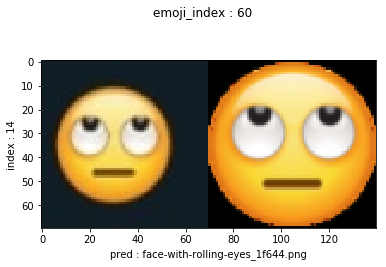

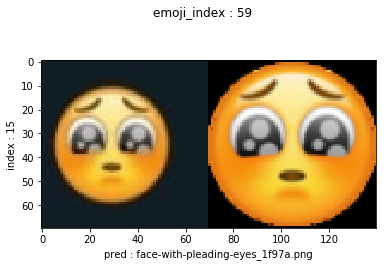

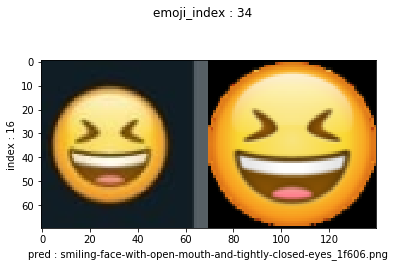

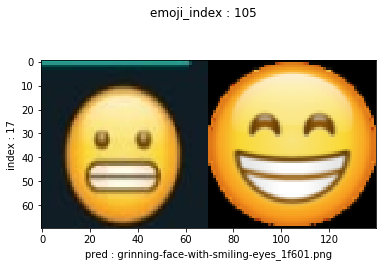

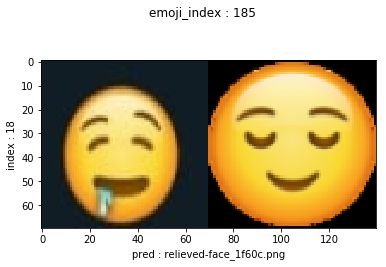

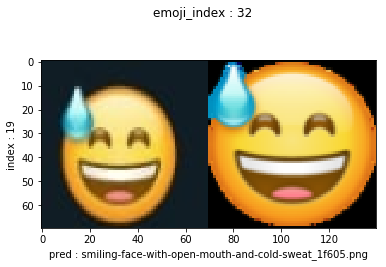

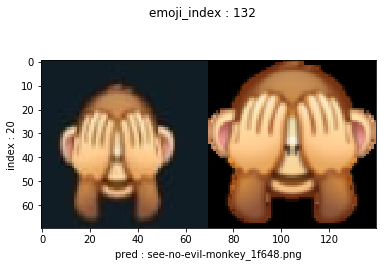

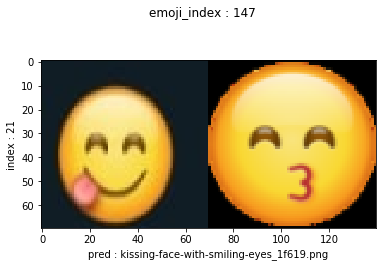

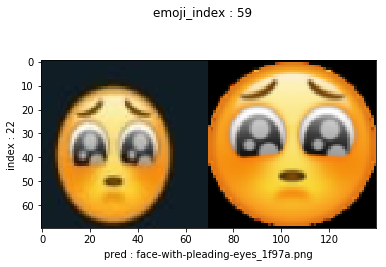

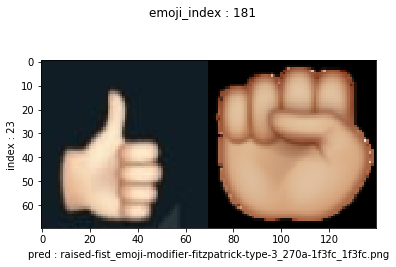

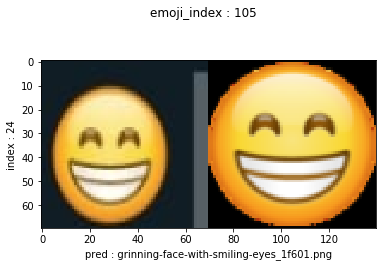

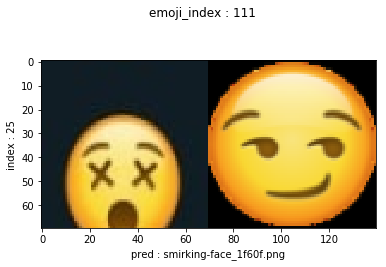

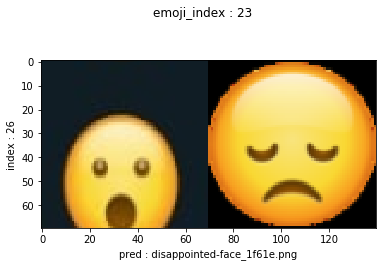

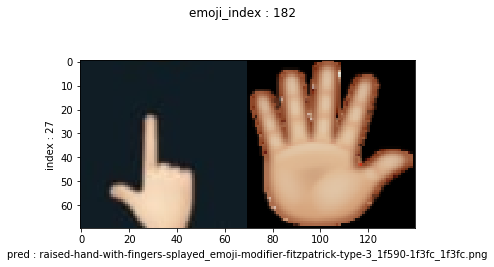

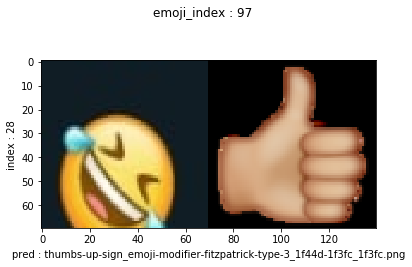

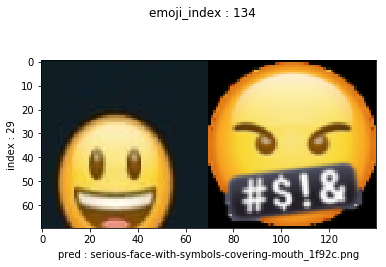

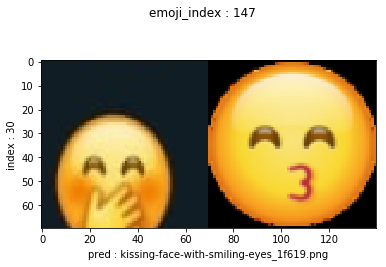

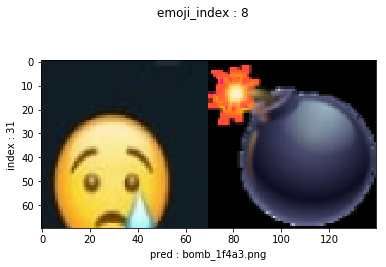

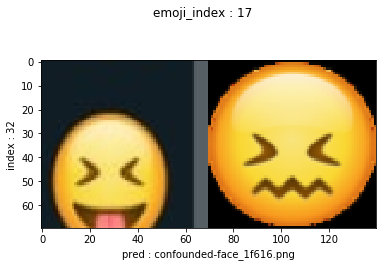

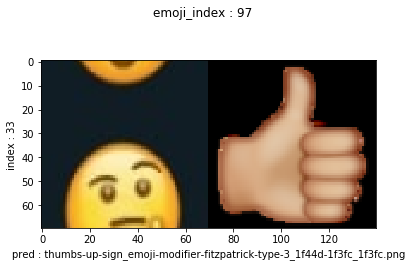

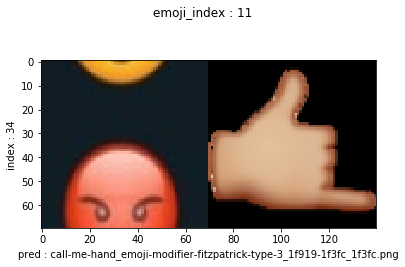

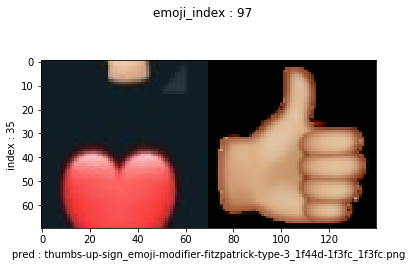

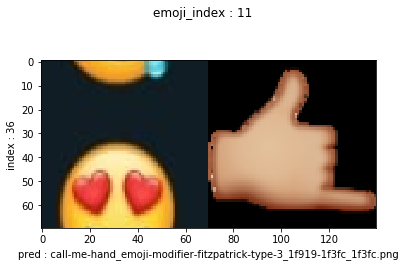

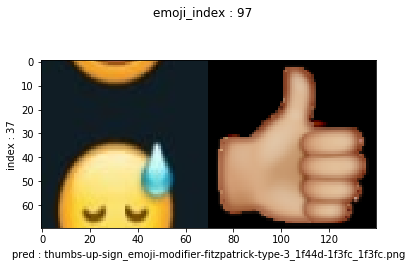

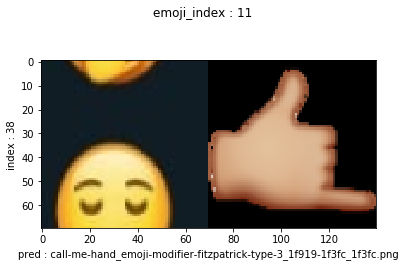

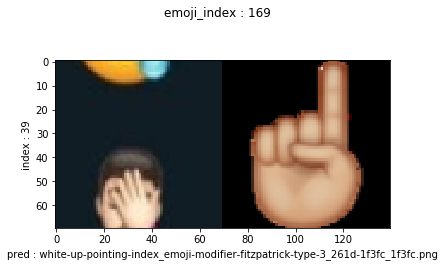

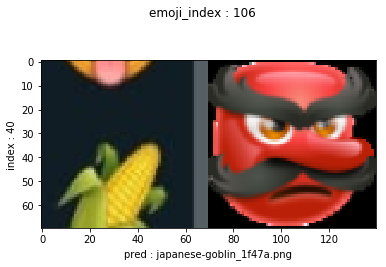

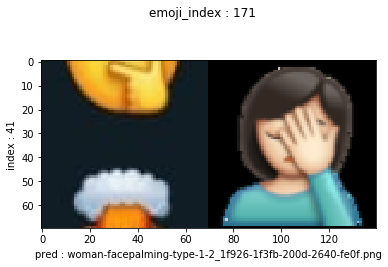

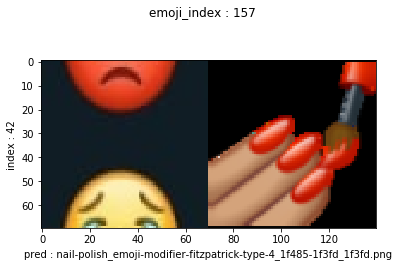

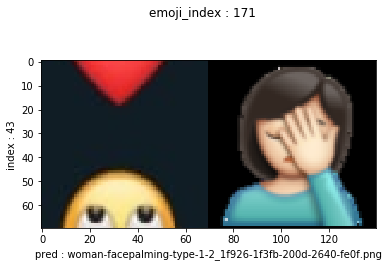

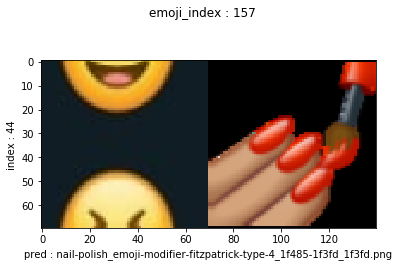

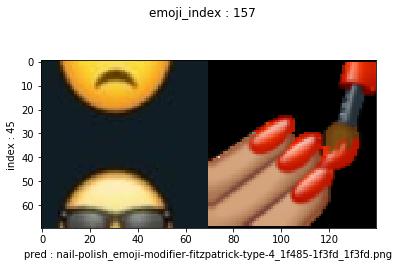

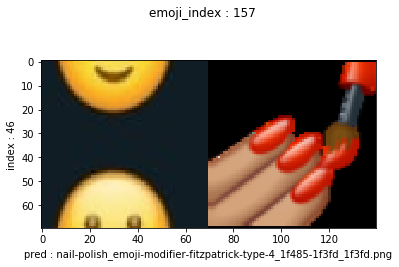

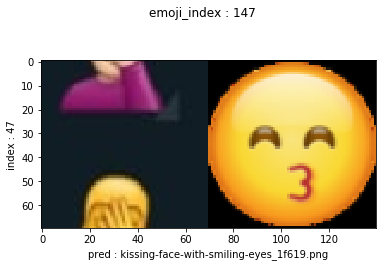

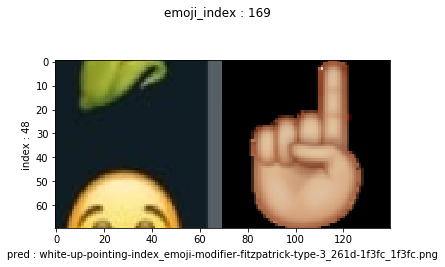

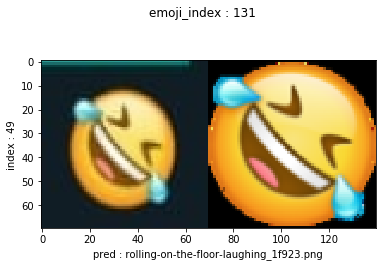

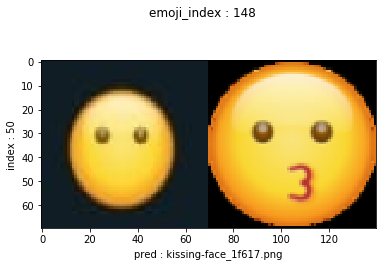

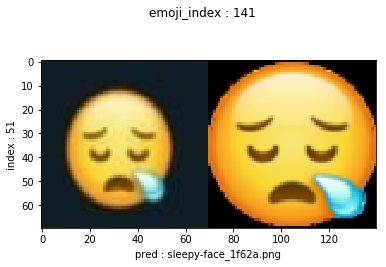

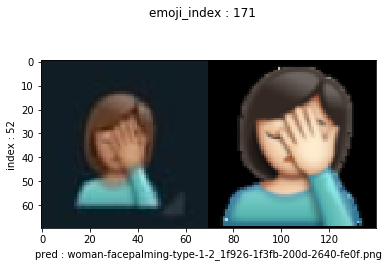

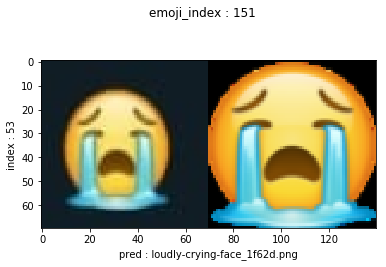

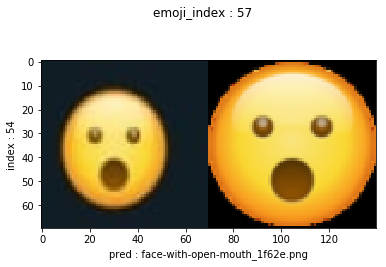

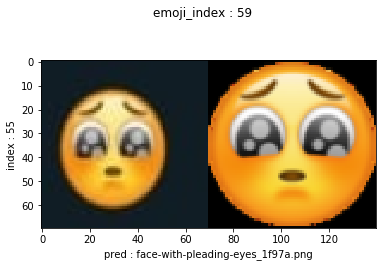

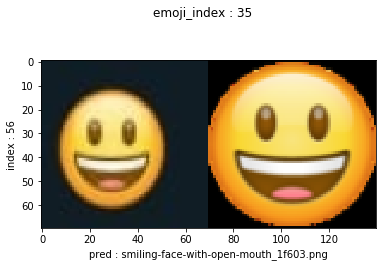

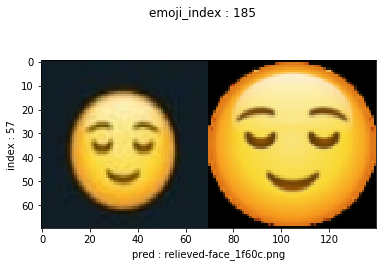

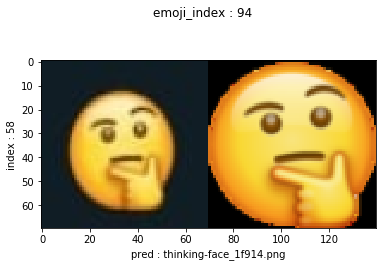

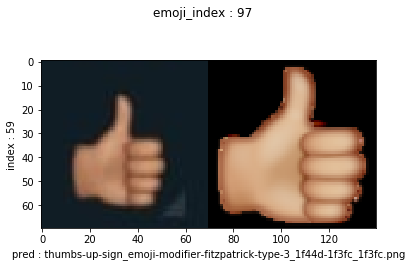

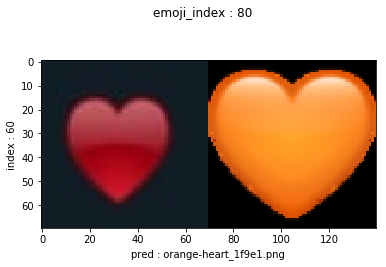

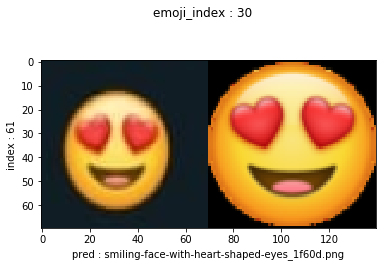

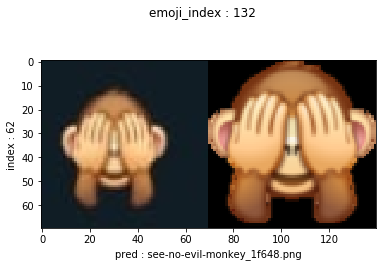

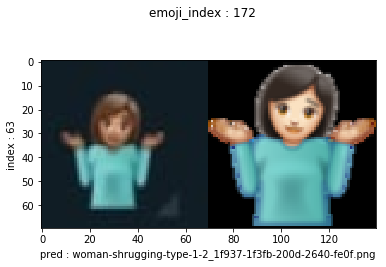

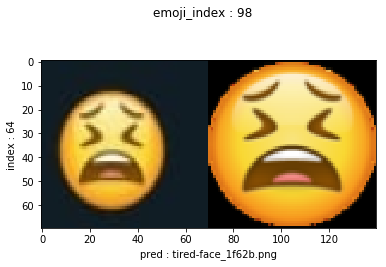

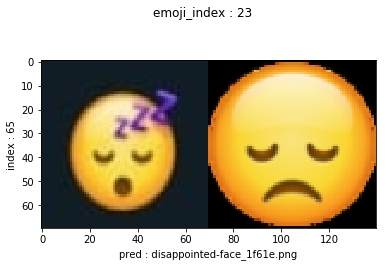

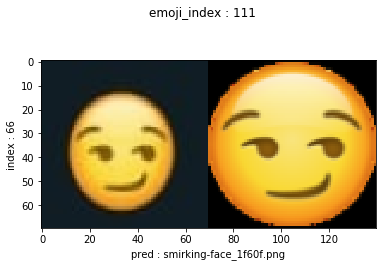

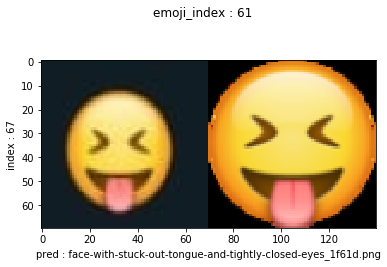

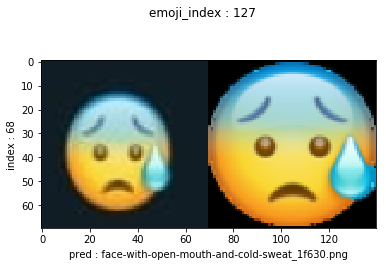

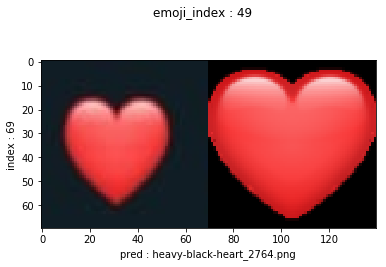

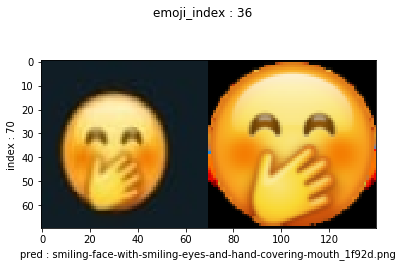

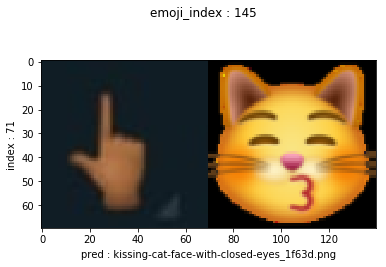

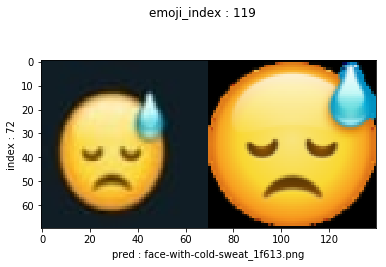

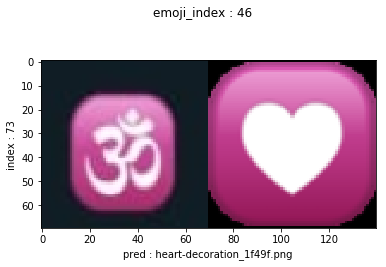

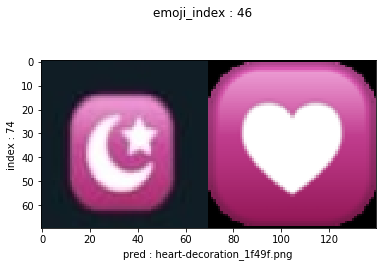

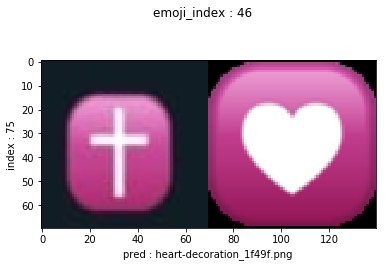

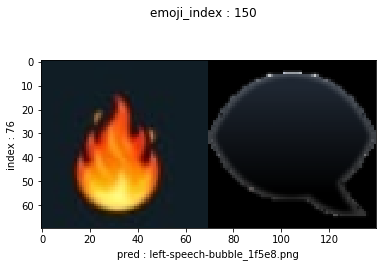

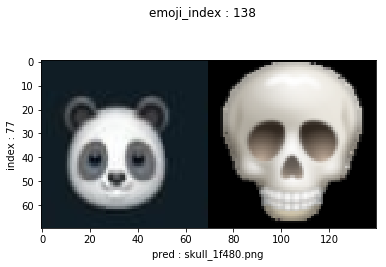

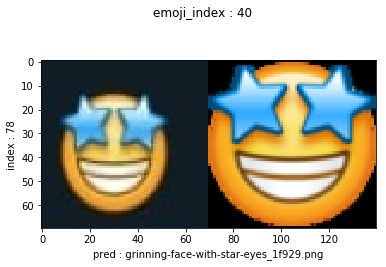

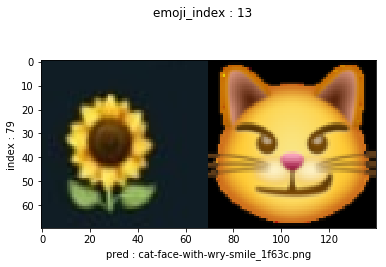

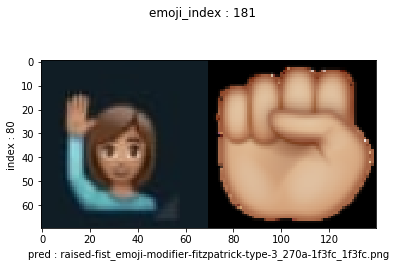

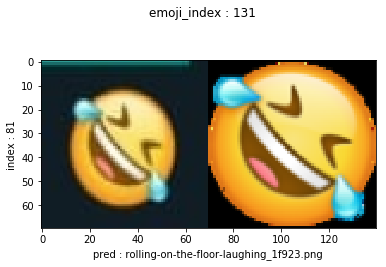

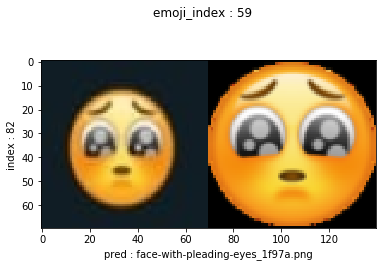

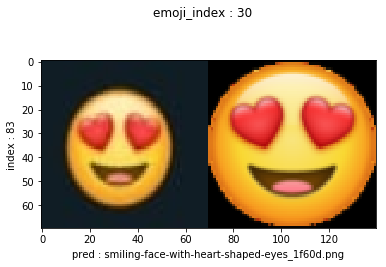

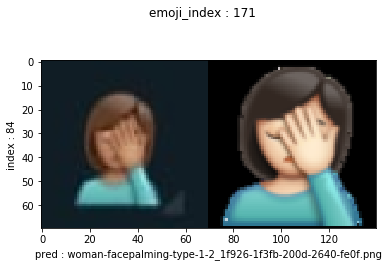

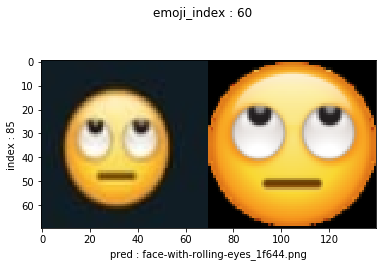

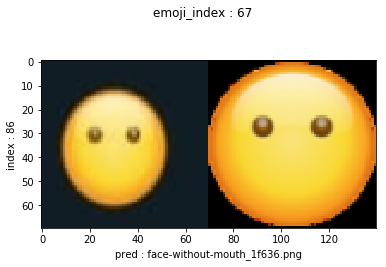

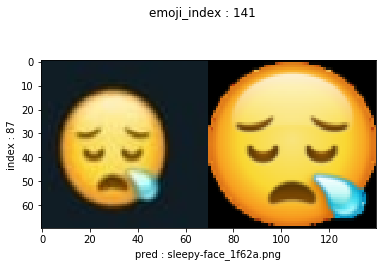

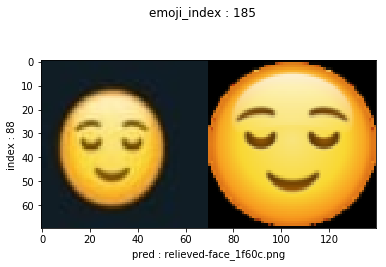

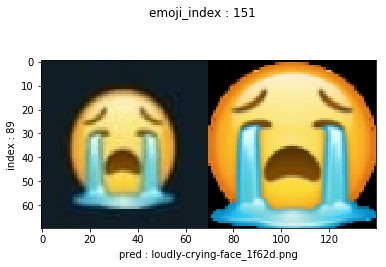

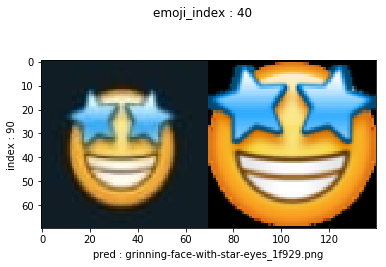

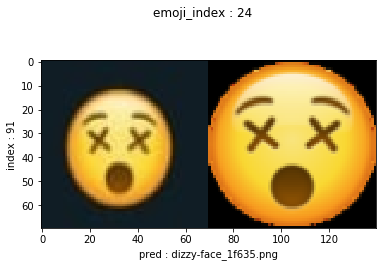

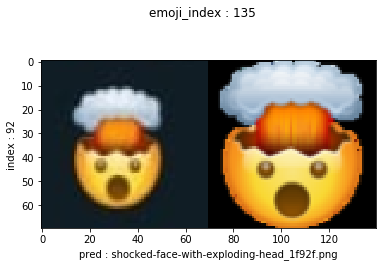

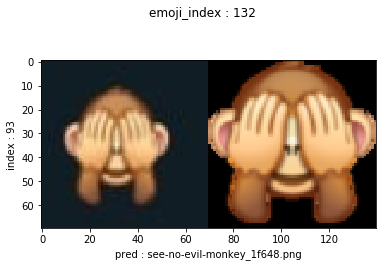

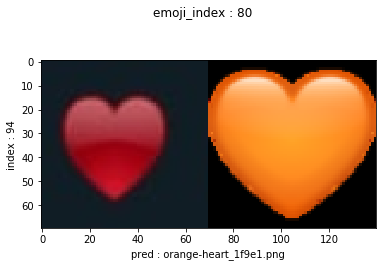

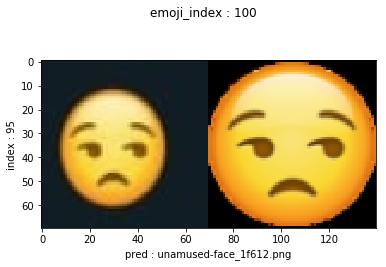

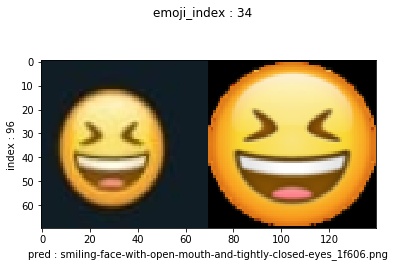

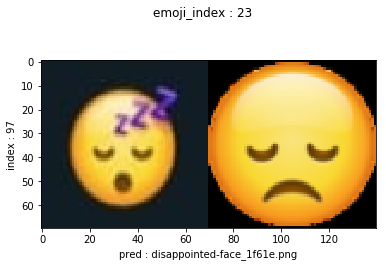

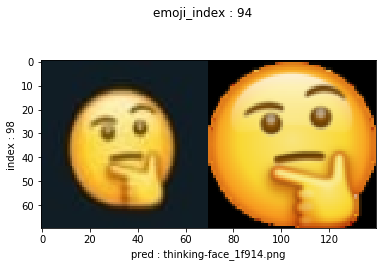

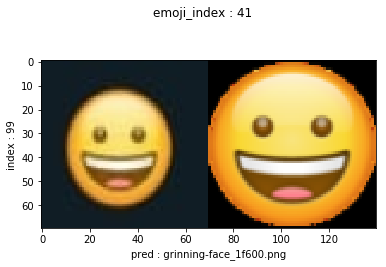

In [262]:
for i in range(len(emoji_list_de_grande[200:300])): ##########
    
    # predicting
    predicted_name = unit_emoji_to_name(emoji_list_de_grande[200:300][i]) #######
    predicted_path = '../../resource/emoji_database/' + predicted_name
    predicted_img = cv2.imread(predicted_path)
    predicted_img = cv2.resize(predicted_img, (70, 70), interpolation = cv2.INTER_AREA) 
    final_img = np.concatenate((emoji_list_de_grande[200:300][i], predicted_img), axis=1) #######
    
    # storing
    predicted_indices_300.append(emoji_index_dict[predicted_name]) ########
    
    # plotting
    plt.imshow(cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))
    plt.ylabel('index : '+str(i))
    plt.xlabel('pred : '+str(predicted_name))
    plt.suptitle('emoji_index : ' + str(emoji_index_dict[predicted_name]))
    plt.show()

In [328]:
predicted_indices_300[94]

80

In [331]:
emoji_index_dict['sleeping-face_1f634.png']

139

### le changes de top 400

### le changes de top 100

In [164]:
predicted_indices_100[3] = emoji_index_dict['thumbs-up-sign_emoji-modifier-fitzpatrick-type-3_1f44d-1f3fc_1f3fc.png']

predicted_indices_100[13] = emoji_index_dict['slightly-smiling-face_1f642.png']

predicted_indices_100[19] = emoji_index_dict['hand-with-index-and-middle-fingers-crossed_emoji-modifier-fitzpatrick-type-3_1f91e-1f3fc_1f3fc.png']

predicted_indices_100[35] = emoji_index_dict['pouting-face_1f621.png']

predicted_indices_100[80] = emoji_index_dict['orange-heart_1f9e1.png']

predicted_indices_100[82] = emoji_index_dict['yellow-heart_1f49b.png']

predicted_indices_100[84] = emoji_index_dict['green-heart_1f49a.png']

predicted_indices_100[87] = emoji_index_dict['blue-heart_1f499.png']

predicted_indices_100[95] = emoji_index_dict['man-facepalming-type-1-2_1f926-1f3fb-200d-2642-fe0f.png']

### le changes de top 200

In [243]:
predicted_indices_200[2] = emoji_index_dict['man-shrugging-type-1-2_1f937-1f3fb-200d-2642-fe0f.png']

predicted_indices_200[17] = emoji_index_dict['reversed-hand-with-middle-finger-extended_emoji-modifier-fitzpatrick-type-3_1f595-1f3fc_1f3fc.png']

predicted_indices_200[20] = emoji_index_dict['slightly-frowning-face_1f641.png']

predicted_indices_200[43] = emoji_index_dict['man-facepalming-type-1-2_1f926-1f3fb-200d-2642-fe0f.png']

predicted_indices_200[86] = emoji_index_dict['man-facepalming-type-1-2_1f926-1f3fb-200d-2642-fe0f.png']

### le changes de top 300

In [265]:
predicted_indices_300[5] = emoji_index_dict['pouting-face_1f621.png']

predicted_indices_300[17] = emoji_index_dict['grimacing-face_1f62c.png']

predicted_indices_300[18] = emoji_index_dict['drooling-face_1f924.png']

predicted_indices_300[21] = emoji_index_dict['face-savouring-delicious-food_1f60b.png']

predicted_indices_300[23] = emoji_index_dict['thumbs-up-sign_emoji-modifier-fitzpatrick-type-3_1f44d-1f3fc_1f3fc.png']

predicted_indices_300[25] = emoji_index_dict['dizzy-face_1f635.png']

predicted_indices_300[26] = emoji_index_dict['face-with-open-mouth_1f62e.png']

predicted_indices_300[27] = emoji_index_dict['white-up-pointing-index_emoji-modifier-fitzpatrick-type-3_261d-1f3fc_1f3fc.png']

predicted_indices_300[28] = emoji_index_dict['rolling-on-the-floor-laughing_1f923.png']

predicted_indices_300[29] = emoji_index_dict['smiling-face-with-open-mouth_1f603.png']

predicted_indices_300[30] = emoji_index_dict['smiling-face-with-smiling-eyes-and-hand-covering-mouth_1f92d.png']

predicted_indices_300[31] = emoji_index_dict['crying-face_1f622.png']

predicted_indices_300[32] = emoji_index_dict['face-with-stuck-out-tongue-and-tightly-closed-eyes_1f61d.png']

predicted_indices_300[50] = emoji_index_dict['face-without-mouth_1f636.png']

predicted_indices_300[65] = emoji_index_dict['sleeping-face_1f634.png']

predicted_indices_300[71] = emoji_index_dict['white-up-pointing-index_emoji-modifier-fitzpatrick-type-3_261d-1f3fc_1f3fc.png']

predicted_indices_300[94] = emoji_index_dict['heavy-black-heart_2764.png']

predicted_indices_300[97] = emoji_index_dict['sleeping-face_1f634.png']

##### Removing the the indices which does not have the corresponding emojis in the database

In [307]:
remove_list_1 = []

In [327]:
remove_list.append(80)

In [333]:
remove_list_300 = remove_list

In [335]:
len(remove_list_300)

24

##### Printing

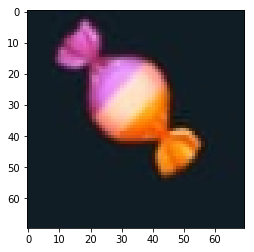

In [182]:
plt.imshow(cv2.cvtColor(emoji_list_de_grande[18], cv2.COLOR_BGR2RGB))
plt.show()

In [336]:
# pickling top 100

with open('../../lib/remove_list_300.pickle', 'wb') as handle:
    pickle.dump(remove_list_300, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../../lib/predicted_indices_300.pickle', 'wb') as handle:
    pickle.dump(predicted_indices_300, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [337]:

with open('../../lib/remove_list_300.pickle', 'rb') as handle:
    remove_list_300 = pickle.load(handle)

with open('../../lib/predicted_indices_300.pickle', 'rb') as handle:
    predicted_indices_300 = pickle.load(handle)

In [228]:
#final_images = []
#final_labels = []

In [338]:
for i in range(100):
    if i not in remove_list_300:                ################
        final_images.append(emoji_list_de_grande[200:300][i])  ###########
        final_labels.append(predicted_indices_300[i])          ###########

In [344]:
len(final_labels)

266

### Dumping images and labels with pickle

In [340]:
# dumping
with open('../../lib/final_images.pickle', 'wb') as handle:
    pickle.dump(final_images, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('../../lib/final_labels.pickle', 'wb') as handle:
    pickle.dump(final_labels, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [342]:
# reopening
with open('../../lib/final_images.pickle', 'rb') as handle:
    final_images = pickle.load(handle)

with open('../../lib/final_labels.pickle', 'rb') as handle:
    final_labels = pickle.load(handle)